# Product Comparison for Weather Atrribute (2st July - 8th July) (Forecast Weather Data)

In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re #regukar expression
import warnings
import pytz #date-time conversion
import requests #to get info from server
import datetime as dt
import json

from pandas.io.json import json_normalize
from IPython.display import display
from datetime import datetime
from pandas.io.json import json_normalize
from datetime import date, timedelta
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  #ignores the warning message and code runs faster # default='warn'

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

from IPython.display import display
from IPython.display import HTML
# import geopy.distance
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

## **UDF to pull weather source data**

In [3]:
def ws_forecast_data(start, end, lat, long, period='day', fields='all'):
    '''
    Timestamp should be converted to ISO 8601 format
    Docstring with examples and function return values:
    
    Input :
    start - (%Y-%m-%d) format
    end - (%Y-%m-%d) format
    lat - latitude 
    long - longitude
    period - hour, day (default=day)
    
    Output : returns forecast data upto 15 days ahead of forecast data and 240 hours of hourly weather data for a latitude/longitude point
    
    '''
    key = 'e721181f854ac2268ee8'
    start = pd.to_datetime(start,format='%Y-%m-%d')
    end = pd.to_datetime(end, format='%Y-%m-%d')
    
    start = start.strftime('%Y-%m-%dT%H:%M:%S')
    end = end.strftime('%Y-%m-%dT%H:%M:%S')
    
    weather_ = pd.DataFrame()
    link = 'https://api.weathersource.com/v1/'+key+'/points/'+lat+','+long+'/forecast.json?period='+period+'&timestamp_between='+start+','+end+'&fields='+fields
    print(link)
    response = requests.get(link)
    json_obj = json.loads(response.content.decode('utf-8'))
    weather_ = json_normalize(json_obj)
    
    return weather_

## **UDF to pull Dark-sky data**

In [4]:
def getdarkskydatadaily(start,end,loc_name):
    """
    
    Input - start_date, end_date, API KEY from https://darksky.net/dev/register (now closed APPLE has acqired darksky)
    Output -daily level weather data from start date to end date for specified location
    
    """
    #api_key = '12ea26d5539f1add37b448b7db20f6b8'
    api_key ='03f7d7221972645470c7e8c6f35edd85'
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { 
                "http"  : http_proxy, 
                "https" : https_proxy, 
                "ftp"   : ftp_proxy
                 }
    
    weather_data_daily = pd.DataFrame()
    date_list = []
    
    # get month,year and day from start date
    start_date = dt.datetime.strptime(start, "%Y-%m-%d")
    start_month = start_date.month
    start_year = start_date.year
    start_day = start_date.day
    
    # get month,year and day from end date
    end_date = dt.datetime.strptime(end, "%Y-%m-%d")
    end_month = end_date.month
    end_year = end_date.year
    end_day = end_date.day
    
    # store all date from start date to end date in date list 
    start_date = date(start_year, start_month, start_day)
    end_date = date(end_year, end_month, end_day)
    delta = timedelta(days=1)
    
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    
    # latitude of the location markers
    sites_latitude = {
        'Marker 1' : '39.9613','Marker 2' : '39.8971','Marker 3' : '39.9060','Marker 4' : '39.9024','Marker 5' : '39.8960','Marker 6' : '39.8339',
        'Marker 7' : '39.8412','Marker 8' : '39.8381','Marker 9' : '39.8386','Marker 10' : '39.7579','Marker 11' : '39.7621','Marker 12' : '39.7621',
        'Marker 13' : '39.7695','Marker 14' : '39.6617','Marker 15' : '39.6639','Marker 16' : '39.6702','Marker 17' : '39.6744','Marker 18' : '39.5909',
        'Marker 19' : '39.5295','Marker 20' : '39.5475'
    }
    
    # longitude of the location markers
    sites_longitude = {
        'Marker 1' : '-86.4034','Marker 2' : '-86.3045','Marker 3' : '-86.2001','Marker 4' : '-86.0738','Marker 5' : '-85.9783','Marker 6' : '-86.3155',
        'Marker 7' : '-86.2056','Marker 8' : '-86.0985','Marker 9' : '-85.9811','Marker 10' : '-86.3155','Marker 11' : '-86.2042','Marker 12' : '-86.0923',
        'Marker 13' : '-85.9708','Marker 14' : '-86.2935','Marker 15' : '-86.1823','Marker 16' : '-86.0669','Marker 17' : '-85.9557','Marker 18' : '-86.4212',
        'Marker 19' : '-86.5874','Marker 20' : '-86.2743'
    }
    
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    if(value1 == None and value2 == None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some other Consumer Location or Generation Location Name.. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)):
            #requesting web page
            date_format = '%Y-%m-%dT%H:%M:%S'
            dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            links = 'https://api.darksky.net/forecast/'+api_key+'/'+sites_latitude.get(loc_name)+','+sites_longitude.get(loc_name)+','+str(dates)+'?exclude=currently,hourly,alerts?units=us'
            print(links)
            response = requests.get(links,headers=headers,proxies=proxyDict)

            # converting into json
            weather = json.loads(response.content.decode('utf-8'))
            # getting it into data frame
            weather_data = json_normalize(weather['daily']['data'])
            weather_data_daily = weather_data_daily.append(weather_data,sort=True)
    
    weather_data_daily.reset_index(drop=True, inplace=True)
    
    return weather_data_daily

## UDF to ClimaCell Weather Data

In [5]:
def forecast_daily_pull_request(start, end, loc_name):
    '''
    
    Input
    start - start_date for pull request in string format
    end - end_date for pull requqest in string format
    loc_name - name of the location in string format
    
    Output
    forecasted daily weather data in raw format from climacell
    
    '''
    
    # proxy settings for api calls
    headers = {'User-Agent': 'Chrome/78and.0.3865.90'}
    http_proxy  = "http://10.245.5.249:8080"
    https_proxy = "https://10.245.5.249:8080"
    ftp_proxy   = "ftp://10.245.5.249:8080"

    proxyDict = { "http"  : http_proxy, "https" : https_proxy, "ftp"   : ftp_proxy }
    
    # latitude of the location markers
    sites_latitude = {
        'Marker 1' : '39.9613','Marker 2' : '39.8971','Marker 3' : '39.9060','Marker 4' : '39.9024','Marker 5' : '39.8960','Marker 6' : '39.8339',
        'Marker 7' : '39.8412','Marker 8' : '39.8381','Marker 9' : '39.8386','Marker 10' : '39.7579','Marker 11' : '39.7621','Marker 12' : '39.7621',
        'Marker 13' : '39.7695','Marker 14' : '39.6617','Marker 15' : '39.6639','Marker 16' : '39.6702','Marker 17' : '39.6744','Marker 18' : '39.5909',
        'Marker 19' : '39.5295','Marker 20' : '39.5475', 'Alpaugh' : '35.8877', 'Baker' : '35.2675', 'Bakersfield' : '35.3733', 'Boron' : '34.9994',
        'Butte_city' : '39.7284', 'Calexico' : '32.6789', 'Calipatria' : '33.1256', 'Cantua_Creek' : '36.5013', 'Desert_Center' : '33.7133',
        'Ducor' : '35.8916', 'El_Centro' : '32.792', 'El_Dorado_hills' : '38.6857', 'Fresno' : '36.7477', 'Gustine' : '37.2577', 'Hanford' : '36.3275',
        'Hinkley' : '34.9345', 'Huron' : '36.2027', 'Lancaster' : '34.6868', 'Lemoore' : '36.3008', 'Lost_Hills' : '35.6163', 'Mecca' : '33.5717', 
        'Mendota' : '36.7536', 'Merced' : '37.3021', 'Mojave' : '35.0525', 'Nipton' : '35.4668', 'Paicines' : '36.7289', 'Palmdale' : '34.5794',
        'Placer' : '39.0600', 'Plumas' : '39.0221', 'Rosamond' : '34.8641', 'San_Bernardino' : '34.1157', 'San_Miguel' : '35.7525', 'Santa_Margarita' : '35.39',
        'Seeley' : '32.7931', 'Shandon' : '35.6552', 'Shasta' : '41.3102', 'Tehachapi' : '35.1322', 'Tranquillity' : '35.3733', 'Tuolumne' : '37.8774',
        'Burbank' : '34.1808', 'Los_Angeles' : '34.0522', 'Long_Beach' : '33.7701'
    }
    
    # longitude of the location markers
    sites_longitude = {
        'Marker 1' : '-86.4034','Marker 2' : '-86.3045','Marker 3' : '-86.2001','Marker 4' : '-86.0738','Marker 5' : '-85.9783','Marker 6' : '-86.3155',
        'Marker 7' : '-86.2056','Marker 8' : '-86.0985','Marker 9' : '-85.9811','Marker 10' : '-86.3155','Marker 11' : '-86.2042','Marker 12' : '-86.0923',
        'Marker 13' : '-85.9708','Marker 14' : '-86.2935','Marker 15' : '-86.1823','Marker 16' : '-86.0669','Marker 17' : '-85.9557','Marker 18' : '-86.4212',
        'Marker 19' : '-86.5874','Marker 20' : '-86.2743', 'Alpaugh' : '-119.4873', 'Baker' : '-116.0739', 'Bakersfield' : '-119.0187', 'Boron' : '-117.6498',
        'Butte_city' : '-121.8374', 'Calexico' : '-115.4989', 'Calipatria' : '-115.5142', 'Cantua_Creek' : '-120.3163', 'Desert_Center' : '-115.4004',
        'Ducor' : '-119.0473', 'El_Centro' : '-115.5631', 'El_Dorado_hills' : '-121.0821', 'Fresno' : '-119.7723', 'Gustine' : '-120.9988', 'Hanford' : '-119.6457',
        'Hinkley' : '-117.1993', 'Huron' : '-120.1029', 'Lancaster' : '-118.1542', 'Lemoore' : '-119.7829', 'Lost_Hills' : '-119.6943', 'Mecca' : '-116.0772',
        'Mendota' : '-120.3816', 'Merced' : '-120.4829', 'Mojave' : '-118.174', 'Nipton' : '-115.2712', 'Paicines' : '-121.2789', 'Palmdale' : '-118.1165',
        'Placer' : '-120.7300', 'Plumas' : '-121.5584', 'Rosamond' : '-118.1634', 'San_Bernardino' : '-117.3023', 'San_Miguel' : '-120.6963', 'Santa_Margarita' : '-120.6093',
        'Seeley' : '-115.6911', 'Shandon' : '-120.3754', 'Shasta' : '-122.3123', 'Tehachapi' : '-118.449', 'Tranquillity' : '-119.0187', 'Tuolumne' : '-119.3771',
        'Burbank' : '-118.309', 'Los Angeles' : '-118.2437', 'Long_Beach' : '-118.1937'
    }
    
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    check_start_date = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
    check_end_date = check_start_date + timedelta(days=15)
    
    if(start < check_start_date):
        print("Bad start date, start date should today's date")
    elif(end > check_end_date):
        print("Daily endpoint requqest will pull data for next 15 days only")
    else :
        print("We are good to go")
    
    date_list = []
    delta = timedelta(days=1)

    while start <= end:
        date_list.append(start.strftime("%Y-%m-%d"))
        start += delta
    
    weather_data = pd.DataFrame()
    value1 = sites_latitude.get(loc_name)
    value2 = sites_longitude.get(loc_name)
    
    if(value1 is None and value2 is None):
        print('Unknown Location Name Used: %s',loc_name)
        print('\n')
        print('Use some location name which already defined in sites_longitude, sites_latitude dictionary .. .. ..')
        print('\n')
    else :
        for i in range(len(date_list)-1):
            date_format = '%Y-%m-%dT%H:%M:%S'
            start_dates = dt.datetime.strptime(date_list[i], '%Y-%m-%d').strftime(date_format)
            end_dates = dt.datetime.strptime(date_list[i+1], '%Y-%m-%d').strftime(date_format)
        
            url = "https://api.climacell.co/v3/weather/forecast/daily"
            print(url)
            querystring = {
                "lat": sites_latitude.get(loc_name),"lon": sites_longitude.get(loc_name),
                "unit_system": "us" , "start_time": start_dates, "end_time": end_dates,
                "apikey": "8S1mZisNIgMuHAO4VhGx76Uy4vgblWO8", 
                "fields": {'temp', 'feels_like', 'humidity', 'wind_speed','wind_direction', 'baro_pressure', 'precipitation',
                           'precipitation_probability', 'precipitation_accumulation','sunrise', 'sunset', 'visibility', 'weather_code'}
                          }

            response = requests.request("GET", url, params=querystring, headers=headers,proxies=proxyDict)

            weather_data_daily = json.loads(response.content.decode('utf-8'))
            
            # separate out variables to account for json format
            weather_data_baro_pressure = pd.io.json.json_normalize(weather_data_daily, 'baro_pressure', record_prefix='baro_pressure.')
            weather_data_feels_like = pd.io.json.json_normalize(weather_data_daily, 'feels_like', record_prefix='feels_like.')
            weather_data_humidity = pd.io.json.json_normalize(weather_data_daily, 'humidity', record_prefix='humidity.')
            weather_data_precipitation = pd.io.json.json_normalize(weather_data_daily, 'precipitation', record_prefix='precipitation.')
            weather_data_temp = pd.io.json.json_normalize(weather_data_daily, 'temp', record_prefix='temp.')
            weather_data_visibility = pd.io.json.json_normalize(weather_data_daily, 'visibility', record_prefix='visibility.')
            weather_data_wind_direction = pd.io.json.json_normalize(weather_data_daily, 'wind_direction', record_prefix='wind_direction.')
            weather_data_wind_speed = pd.io.json.json_normalize(weather_data_daily, 'wind_speed', record_prefix='wind_speed.')
            
            # baro_pressure 
            baro_pressure_max=weather_data_baro_pressure.filter(regex=("max"))
            baro_pressure_max.dropna(how='any',inplace=True)
            baro_pressure_max.reset_index(drop=True,inplace=True)
            baro_pressure_min=weather_data_baro_pressure.filter(regex=("min"))
            baro_pressure_min.dropna(how='any',inplace=True)
            baro_pressure_min.reset_index(drop=True,inplace=True)
            baro_pressure = pd.merge(baro_pressure_max, baro_pressure_min, left_index=True, right_index=True)
            del baro_pressure_max, baro_pressure_min
            
            # feels_like
            feels_like_max=weather_data_feels_like.filter(regex=("max"))
            feels_like_max.dropna(how='any',inplace=True)
            feels_like_max.reset_index(drop=True,inplace=True)
            feels_like_min=weather_data_feels_like.filter(regex=("min"))
            feels_like_min.dropna(how='any',inplace=True)
            feels_like_min.reset_index(drop=True,inplace=True)
            feels_like = pd.merge(feels_like_max, feels_like_min, left_index=True, right_index=True)
            del feels_like_max, feels_like_min
            
            # humidity
            humidity_max=weather_data_humidity.filter(regex=("max"))
            humidity_max.dropna(how='any',inplace=True)
            humidity_max.reset_index(drop=True,inplace=True)
            humidity_min=weather_data_humidity.filter(regex=("min"))
            humidity_min.dropna(how='any',inplace=True)
            humidity_min.reset_index(drop=True,inplace=True)
            humidity = pd.merge(humidity_max, humidity_min, left_index=True, right_index=True)
            del humidity_max, humidity_min
            
            # precipitation
            precipitation_max=weather_data_precipitation.filter(regex=("max"))
            precipitation_max.dropna(how='any',inplace=True)
            precipitation_max.reset_index(drop=True,inplace=True)
            precipitation_min=weather_data_precipitation.filter(regex=("min"))
            precipitation_min.dropna(how='any',inplace=True)
            precipitation_min.reset_index(drop=True,inplace=True)
            precipitation = pd.merge(precipitation_max, precipitation_min, left_index=True, right_index=True)
            del precipitation_max, precipitation_min
            
            # temp
            temp_max=weather_data_temp.filter(regex=("max"))
            temp_max.dropna(how='any',inplace=True)
            temp_max.reset_index(drop=True,inplace=True)
            temp_min=weather_data_temp.filter(regex=("min"))
            temp_min.dropna(how='any',inplace=True)
            temp_min.reset_index(drop=True,inplace=True)
            temp = pd.merge(temp_max, temp_min, left_index=True, right_index=True)
            del temp_max, temp_min
            
            # visibility
            visibility_max=weather_data_visibility.filter(regex=("max"))
            visibility_max.dropna(how='any',inplace=True)
            visibility_max.reset_index(drop=True,inplace=True)
            visibility_min=weather_data_visibility.filter(regex=("min"))
            visibility_min.dropna(how='any',inplace=True)
            visibility_min.reset_index(drop=True,inplace=True)
            visibility = pd.merge(visibility_max, visibility_min, left_index=True, right_index=True)
            del visibility_max, visibility_min
            
            # wind_direction
            wind_direction_max=weather_data_wind_direction.filter(regex=("max"))
            wind_direction_max.dropna(how='any',inplace=True)
            wind_direction_max.reset_index(drop=True,inplace=True)
            wind_direction_min=weather_data_wind_direction.filter(regex=("min"))
            wind_direction_min.dropna(how='any',inplace=True)
            wind_direction_min.reset_index(drop=True,inplace=True)
            wind_direction = pd.merge(wind_direction_max, wind_direction_min, left_index=True, right_index=True)
            del wind_direction_max, wind_direction_min
            
            # wind_speed
            wind_speed_max=weather_data_wind_speed.filter(regex=("max"))
            wind_speed_max.dropna(how='any',inplace=True)
            wind_speed_max.reset_index(drop=True,inplace=True)
            wind_speed_min=weather_data_wind_speed.filter(regex=("min"))
            wind_speed_min.dropna(how='any',inplace=True)
            wind_speed_min.reset_index(drop=True,inplace=True)
            wind_speed = pd.merge(wind_speed_max, wind_speed_min, left_index=True, right_index=True)
            del wind_speed_max, wind_speed_min
            
            weather_attributes = pd.merge(feels_like, humidity, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, precipitation, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, temp, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, visibility, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, wind_direction, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, wind_speed, left_index=True, right_index=True)
            weather_attributes = pd.merge(weather_attributes, baro_pressure, left_index=True, right_index=True)
            
            
            weather_data_normal = pd.io.json.json_normalize(weather_data_daily)
            weather_data_normal.drop(['baro_pressure','feels_like', 'humidity', 'precipitation', 'temp', 'visibility', 'wind_direction', 'wind_speed'],axis=1,inplace=True)
            weather_data_normal = pd.merge(weather_data_normal, weather_attributes, left_index=True, right_index=True)
            del baro_pressure, feels_like, humidity, precipitation, temp, visibility, wind_direction, wind_speed, weather_attributes
            
            weather_data = weather_data.append(weather_data_normal, sort=True, ignore_index=True)
            weather_data.reset_index(drop=True, inplace=True)
    
    weather_data.drop_duplicates(subset=['observation_time.value'], keep='first', inplace=True)
    weather_data.reset_index(drop=True, inplace=True)
    return weather_data

In [9]:
start_date = "2020-08-04"
end_date = "2020-08-08"
location = ('39.9613', '-86.4034')
location_marker = 'Marker 1'

# weathersource_data = ws_forecast_data(start=start_date, end=end_date, lat=location[0], long=location[1], period='day')
# darksky_data = getdarkskydatadaily(start_date,end_date,location_marker)
climacell_data = forecast_daily_pull_request(start_date, end_date, location_marker)

We are good to go
https://api.climacell.co/v3/weather/forecast/daily


KeyError: 'baro_pressure'

In [ ]:
climacell_data

In [10]:
weathersource_data['date_time'] = pd.to_datetime(weathersource_data['timestamp'])
weathersource_data['Date'] = weathersource_data['date_time'].dt.date

###########################################################################################################################################################################################################
###########################################################################################################################################################################################################

darksky_data['date_time'] = pd.to_datetime(darksky_data['time'],unit='s')
darksky_data['date_time']=darksky_data['date_time'].astype(str)
 
#shift data from gmt to est time
def date_convert(date):
    date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    my_timestamp = date # some timestamp
    old_timezone = pytz.timezone("GMT")
    new_timezone = pytz.timezone("US/Eastern")

    # returns datetime in the new timezone
    my_timestamp_in_new_timezone = old_timezone.localize(my_timestamp).astimezone(new_timezone)
    return pd.to_datetime(my_timestamp_in_new_timezone)

###########################################################################################################################################################################################################
###########################################################################################################################################################################################################
climacell_data['Date'] = pd.to_datetime(climacell_data['observation_time.value'])
darksky_data['date_time'] = darksky_data.apply(lambda x: date_convert(x['date_time']),axis=1)
darksky_data['Date'] = darksky_data['date_time'].dt.date

weathersource_data.drop(['date_time'],axis=1,inplace=True)
darksky_data.drop(['date_time'],axis=1,inplace=True)
climacell_data.drop(['observation_time.value'],axis=1,inplace=True)

In [11]:
print('\n')
print('\n')
print("Weather Source Data")
weathersource_data = weathersource_data[['Date','cldCvrAvg', 'cldCvrMax', 'cldCvrMin', 'dewPtAvg', 'dewPtMax', 'dewPtMin', 'feelsLikeAvg',
                                         'feelsLikeMax', 'feelsLikeMin', 'heatIndexAvg', 'heatIndexMax', 'heatIndexMin', 'latitude',
                                         'longitude', 'mslPresAvg', 'mslPresMax', 'mslPresMin', 'precip', 'precipProb', 'radSolarAvg',
                                         'radSolarMax', 'radSolarMin', 'radSolarTot', 'relHumAvg', 'relHumMax', 'relHumMin', 'sfcPresAvg',
                                         'sfcPresMax', 'sfcPresMin', 'snowfall', 'snowfallProb', 'spcHumAvg', 'spcHumMax', 'spcHumMin',
                                         'tempAvg', 'tempMax', 'tempMin', 'timestamp', 'timestampInit', 'wetBulbAvg', 'wetBulbMax', 
                                         'wetBulbMin', 'windChillAvg', 'windChillMax', 'windChillMin', 'windDir100mAvg', 'windDir80mAvg',
                                         'windDirAvg', 'windSpd100mAvg', 'windSpd100mMax', 'windSpd100mMin', 'windSpd80mAvg', 'windSpd80mMax',
                                         'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin']]
display(weathersource_data.head())
print('\n')
print('\n')
print('\n')
print('\n')
print('Darksky Weather Data')
darksky_data = darksky_data[['Date', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime',
                             'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'cloudCover',
                             'dewPoint', 'humidity', 'icon', 'moonPhase', 'ozone', 'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxError',
                             'precipIntensityMaxTime', 'precipProbability', 'precipType', 'pressure', 'summary', 'sunriseTime', 'sunsetTime', 'temperatureHigh',
                             'temperatureHighError', 'temperatureHighTime', 'temperatureLow', 'temperatureLowError', 'temperatureLowTime', 'temperatureMax',
                             'temperatureMaxError', 'temperatureMaxTime', 'temperatureMin', 'temperatureMinError', 'temperatureMinTime', 'time', 'uvIndex', 
                             'uvIndexTime', 'visibility', 'windBearing', 'windGust', 'windGustTime', 'windSpeed']]
display(darksky_data.head())
print('\n')
print('\n')
print('\n')
print('\n')
print('Climacell Weather Data')
climacell_data = climacell_data[['Date','baro_pressure.max.units', 'baro_pressure.max.value', 'baro_pressure.min.units', 'baro_pressure.min.value', 'feels_like.max.units',
                                 'feels_like.max.value', 'feels_like.min.units', 'feels_like.min.value', 'humidity.max.units', 'humidity.max.value', 'humidity.min.units',
                                 'humidity.min.value', 'lat', 'lon', 'precipitation.max.units', 'precipitation.max.value', 'precipitation_accumulation.units', 
                                 'precipitation_accumulation.value', 'precipitation_probability.units', 'precipitation_probability.value', 'sunrise.value', 
                                 'sunset.value', 'temp.max.units', 'temp.max.value', 'temp.min.units', 'temp.min.value', 'visibility.max.units', 
                                 'visibility.max.value', 'visibility.min.units', 'visibility.min.value', 'weather_code.value', 'wind_direction.max.units',
                                 'wind_direction.max.value', 'wind_direction.min.units', 'wind_direction.min.value', 'wind_speed.max.units', 'wind_speed.max.value',
                                 'wind_speed.min.units', 'wind_speed.min.value']]
display(climacell_data.head())
print('\n')
print('\n')






Weather Source Data


,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,precipProb,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,snowfallProb,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,timestampInit,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin
0,2020-07-02,2,20,0,63.90,68.10,59.80,77.10,85.40,66.00,77.10,85.40,66.00,39.96,-86.40,1015.30,1016.50,1014.10,0.00,0,340.50,950.00,0,8171.50,69.90,84.90,55.00,982.70,983.90,981.30,0,0,13.10,15.20,11.20,74.70,83.20,65.90,2020-07-02T00:00:00-04:00,2020-07-01T02:00:00-04:00,67.50,71.90,62.00,74.70,83.10,66.00,68,67,59,12.10,14.70,9.80,11.60,13.70,9.60,7.80,9.80,5.70
1,2020-07-03,59,100,0,65.30,70.20,61.10,78.10,86.50,66.90,78.10,86.50,66.90,39.96,-86.40,1015.80,1017.20,1014.20,0.00,0,309.70,870.00,0,7432.80,71.80,87.90,54.00,983.20,984.40,981.90,0,0,13.80,16.30,11.80,75.60,83.80,66.60,2020-07-03T00:00:00-04:00,2020-07-01T02:00:00-04:00,68.70,73.50,63.20,75.60,83.50,66.90,37,36,31,9.10,12.20,4.90,8.70,11.90,4.80,6.20,10.20,3.90
2,2020-07-04,9,44,0,69.10,71.60,66.10,80.80,91.30,68.90,80.80,91.30,68.90,39.96,-86.40,1014.60,1016.10,1013.20,0.17,50,328.60,920.00,0,7885.90,77.60,91.40,59.60,982.20,983.70,980.90,0,0,15.70,17.20,14.00,77.10,86.10,68.70,2020-07-04T00:00:00-04:00,2020-07-01T02:00:00-04:00,71.50,75.40,67.00,77.10,85.90,68.90,32,31,22,8.70,11.10,5.70,8.40,10.50,5.60,6.00,8.70,3.70
3,2020-07-05,6,23,0,68.30,71.30,64.80,80.80,89.40,69.30,80.80,89.40,69.30,39.96,-86.40,1014.10,1015.70,1013.00,0.12,5,316.40,895.20,0,7592.40,74.80,86.40,58.80,981.60,982.90,980.50,0,0,15.20,17.00,13.40,77.20,85.20,69.00,2020-07-05T00:00:00-04:00,2020-07-01T02:00:00-04:00,71.00,74.70,66.30,77.20,85.10,69.30,65,63,54,9.70,11.40,6.50,9.40,10.90,6.40,6.30,8.40,5.30
4,2020-07-06,10,26,0,66.40,69.90,63.80,82.30,90.40,75.20,82.30,90.40,75.20,39.96,-86.40,1013.50,1014.80,1012.50,0.03,10,321.20,818.20,0,7708.90,66.80,78.70,54.00,981.00,982.30,980.00,0,0,14.40,16.20,13.00,78.60,87.00,70.00,2020-07-06T00:00:00-04:00,2020-06-30T20:00:00-04:00,70.30,73.70,66.10,78.60,86.60,70.60,64,62,46,5.40,9.10,2.30,5.30,8.80,2.30,4.00,6.40,1.80










Darksky Weather Data


,Date,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxError,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowError,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinError,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,2020-07-02,89.98,1593720720,68.01,1593768600,89.98,1593720720,66.33,1593687060,0.10,66.31,0.70,clear-day,0.42,305.90,0.00,0.00,0.08,1593662400,0.01,rain,1015.70,Clear throughout the day.,1593685380,1593739140,87.88,6.10,1593721260,66.75,6.07,1593768780,87.88,6.11,1593721260,65.20,6.08,1593687060,1593662400,10,1593712080,10.00,61,13.68,1593697320,6.60
1,2020-07-03,92.05,1593807360,69.14,1593856140,92.05,1593807360,68.01,1593768600,0.38,66.86,0.70,partly-cloudy-day,0.46,299.60,0.00,0.00,nan,1593776040,0.00,NaN,1016.30,Partly cloudy throughout the day.,1593771780,1593825540,89.82,6.07,1593807180,67.68,6.03,1593856320,89.82,6.08,1593807180,66.75,6.05,1593768780,1593748800,7,1593795480,10.00,10,11.27,1593829620,5.99
2,2020-07-04,95.42,1593890460,72.00,1593940980,95.42,1593890460,69.14,1593856140,0.14,68.75,0.73,clear-day,0.49,301.30,0.01,0.04,0.08,1593899220,0.23,rain,1014.90,Clear throughout the day.,1593858240,1593911940,91.23,6.04,1593890520,70.71,6.00,1593940920,91.23,6.04,1593890520,67.68,6.02,1593856320,1593835200,10,1593884880,10.00,16,9.88,1593835200,6.20
3,2020-07-05,92.86,1593976320,73.18,1594026180,92.86,1593976320,72.00,1593940980,0.11,68.38,0.67,clear-day,0.53,299.30,0.00,0.02,0.08,1593972120,0.08,rain,1013.40,Clear throughout the day.,1593944640,1593998340,89.05,6.01,1593975960,71.38,5.97,1594026120,89.05,6.01,1593975960,70.71,5.99,1593940920,1593921600,9,1593973200,10.00,16,7.23,1593989100,3.96
4,2020-07-06,94.52,1594061460,72.18,1594115460,94.52,1594061460,73.18,1594026180,0.10,70.46,0.73,clear-day,0.56,296.10,0.01,0.04,0.08,1594067400,0.20,rain,1013.40,Humid throughout the day.,1594031100,1594084680,89.19,5.98,1594061460,70.34,5.95,1594115520,89.19,5.98,1594061460,71.38,5.96,1594026120,1594008000,9,1594057860,10.00,138,7.62,1594084020,3.48










Climacell Weather Data


,Date,baro_pressure.max.units,baro_pressure.max.value,baro_pressure.min.units,baro_pressure.min.value,feels_like.max.units,feels_like.max.value,feels_like.min.units,feels_like.min.value,humidity.max.units,humidity.max.value,humidity.min.units,humidity.min.value,lat,lon,precipitation.max.units,precipitation.max.value,precipitation_accumulation.units,precipitation_accumulation.value,precipitation_probability.units,precipitation_probability.value,sunrise.value,sunset.value,temp.max.units,temp.max.value,temp.min.units,temp.min.value,visibility.max.units,visibility.max.value,visibility.min.units,visibility.min.value,weather_code.value,wind_direction.max.units,wind_direction.max.value,wind_direction.min.units,wind_direction.min.value,wind_speed.max.units,wind_speed.max.value,wind_speed.min.units,wind_speed.min.value
0,2020-07-01,inHg,28.98,inHg,28.88,F,88.90,F,64.84,%,93.90,%,66.70,39.96,-86.40,in/hr,0.01,in,0.05,%,25,2020-07-01T10:21:12.587Z,2020-07-02T01:18:20.330Z,F,83.59,F,64.84,mi,15.00,mi,8.40,partly_cloudy,degrees,59.94,degrees,67.96,mph,11.60,mph,5.08
1,2020-07-02,inHg,29.04,inHg,28.97,F,84.31,F,63.42,%,91.20,%,65.20,39.96,-86.40,in/hr,0.00,in,0.00,%,0,2020-07-02T10:21:43.542Z,2020-07-03T01:18:11.337Z,F,81.23,F,63.42,mi,15.00,mi,15.00,mostly_clear,degrees,61.28,degrees,37.92,mph,11.46,mph,4.44
2,2020-07-03,inHg,29.06,inHg,28.98,F,85.93,F,65.08,%,94.70,%,59.60,39.96,-86.40,in/hr,0.00,in,0.00,%,0,2020-07-03T10:22:15.866Z,2020-07-04T01:18:00.347Z,F,82.88,F,65.08,mi,15.00,mi,15.00,cloudy,degrees,9.88,degrees,39.74,mph,9.33,mph,3.63
3,2020-07-04,inHg,29.03,inHg,28.95,F,90.96,F,68.35,%,96.30,%,69.20,39.96,-86.40,in/hr,0.10,in,0.34,%,30,2020-07-04T10:22:49.524Z,2020-07-05T01:17:47.357Z,F,84.35,F,68.35,mi,15.00,mi,14.25,rain_light,degrees,44.97,degrees,110.27,mph,7.83,mph,3.62
4,2020-07-05,inHg,29.01,inHg,28.92,F,87.09,F,67.93,%,85.00,%,58.80,39.96,-86.40,in/hr,0.00,in,0.00,%,15,2020-07-05T10:23:24.474Z,2020-07-06T01:17:32.367Z,F,83.93,F,67.93,mi,15.00,mi,15.00,mostly_cloudy,degrees,27.87,degrees,80.03,mph,7.47,mph,2.10


In [12]:
m1 = pd.merge(weathersource_data,darksky_data, on=['Date'], how='left')
m1['Date'] = pd.to_datetime(m1['Date'])
merged_data = pd.merge(m1,climacell_data, on=['Date'], how='left')
print('\n')
print('\n')
print('Merged Weather Data for Plotting')
display(merged_data.head())
print('\n')
print('\n')
merged_data.to_csv('MergedForecastData-2stJuly-8thJuly.csv')





Merged Weather Data for Plotting


,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,precipProb,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,snowfallProb,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,timestamp,timestampInit,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,humidity,icon,moonPhase,ozone,precipIntensity,precipIntensityMax,precipIntensityMaxError,precipIntensityMaxTime,precipProbability,precipType,pressure,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowError,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinError,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed,baro_pressure.max.units,baro_pressure.max.value,baro_pressure.min.units,baro_pressure.min.value,feels_like.max.units,feels_like.max.value,feels_like.min.units,feels_like.min.value,humidity.max.units,humidity.max.value,humidity.min.units,humidity.min.value,lat,lon,precipitation.max.units,precipitation.max.value,precipitation_accumulation.units,precipitation_accumulation.value,precipitation_probability.units,precipitation_probability.value,sunrise.value,sunset.value,temp.max.units,temp.max.value,temp.min.units,temp.min.value,visibility.max.units,visibility.max.value,visibility.min.units,visibility.min.value,weather_code.value,wind_direction.max.units,wind_direction.max.value,wind_direction.min.units,wind_direction.min.value,wind_speed.max.units,wind_speed.max.value,wind_speed.min.units,wind_speed.min.value
0,2020-07-02,2,20,0,63.90,68.10,59.80,77.10,85.40,66.00,77.10,85.40,66.00,39.96,-86.40,1015.30,1016.50,1014.10,0.00,0,340.50,950.00,0,8171.50,69.90,84.90,55.00,982.70,983.90,981.30,0,0,13.10,15.20,11.20,74.70,83.20,65.90,2020-07-02T00:00:00-04:00,2020-07-01T02:00:00-04:00,67.50,71.90,62.00,74.70,83.10,66.00,68,67,59,12.10,14.70,9.80,11.60,13.70,9.60,7.80,9.80,5.70,89.98,1593720720,68.01,1593768600,89.98,1593720720,66.33,1593687060,0.10,66.31,0.70,clear-day,0.42,305.90,0.00,0.00,0.08,1593662400,0.01,rain,1015.70,Clear throughout the day.,1593685380,1593739140,87.88,6.10,1593721260,66.75,6.07,1593768780,87.88,6.11,1593721260,65.20,6.08,1593687060,1593662400,10,1593712080,10.00,61,13.68,1593697320,6.60,inHg,29.04,inHg,28.97,F,84.31,F,63.42,%,91.20,%,65.20,39.96,-86.40,in/hr,0.00,in,0.00,%,0,2020-07-02T10:21:43.542Z,2020-07-03T01:18:11.337Z,F,81.23,F,63.42,mi,15.00,mi,15.00,mostly_clear,degrees,61.28,degrees,37.92,mph,11.46,mph,4.44
1,2020-07-03,59,100,0,65.30,70.20,61.10,78.10,86.50,66.90,78.10,86.50,66.90,39.96,-86.40,1015.80,1017.20,1014.20,0.00,0,309.70,870.00,0,7432.80,71.80,87.90,54.00,983.20,984.40,981.90,0,0,13.80,16.30,11.80,75.60,83.80,66.60,2020-07-03T00:00:00-04:00,2020-07-01T02:00:00-04:00,68.70,73.50,63.20,75.60,83.50,66.90,37,36,31,9.10,12.20,4.90,8.70,11.90,4.80,6.20,10.20,3.90,92.05,1593807360,69.14,1593856140,92.05,1593807360,68.01,1593768600,0.38,66.86,0.70,partly-cloudy-day,0.46,299.60,0.00,0.00,nan,1593776040,0.00,NaN,1016.30,Partly cloudy throughout the day.,1593771780,1593825540,89.82,6.07,1593807180,67.68,6.03,1593856320,89.82,6.08,1593807180,66.75,6.05,1593768780,1593748800,7,1593795480,10.00,10,11.27,1593829620,5.99,inHg,29.06,inHg,28.98,F,85.93,F,65.08,%,94.70,%,59.60,39.96,-86.40,in/hr,0.00,in,0.00,%,0,2020-07-03T10:22:15.866Z,2020-07-04T01:18:00.347Z,F,82.88,F,65.08,mi,15.

# Comparison Plots

## **Wind Speed Comparison**

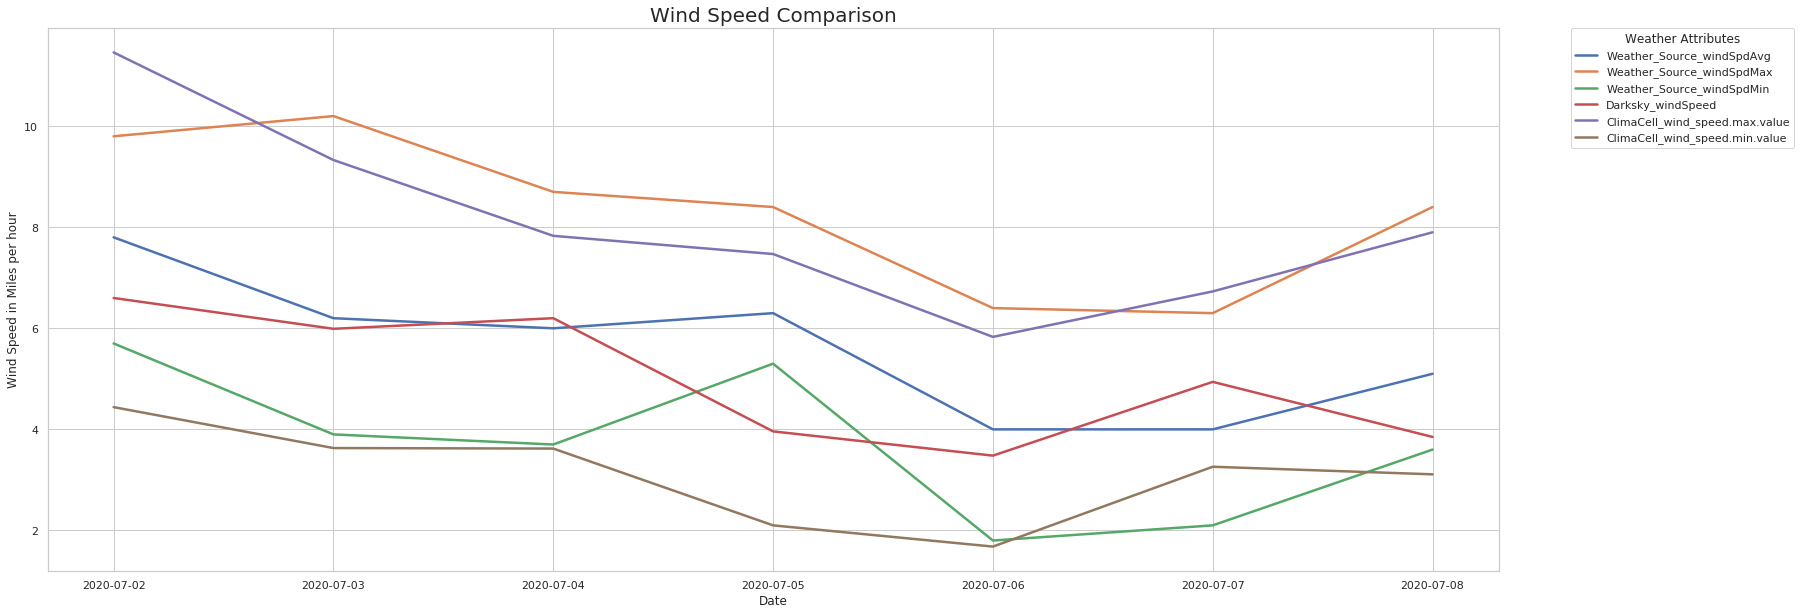

In [13]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'windSpeed', 'wind_speed.max.value', 'wind_speed.min.value']], ['Date']))
    new_labels = ['Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed', 'ClimaCell_wind_speed.max.value', 'ClimaCell_wind_speed.min.value']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Speed in Miles per hour',title="Wind Speed Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Darksky has only one value for Wind Speed i.e. windSpeed but ClimaCell provides minimum and maximum values and Weather Source provide minimum, maximum and average values also has attributes like wind speed at 80m surface and windspeed and 100m surface.**

## **Wind Direction Comparison**

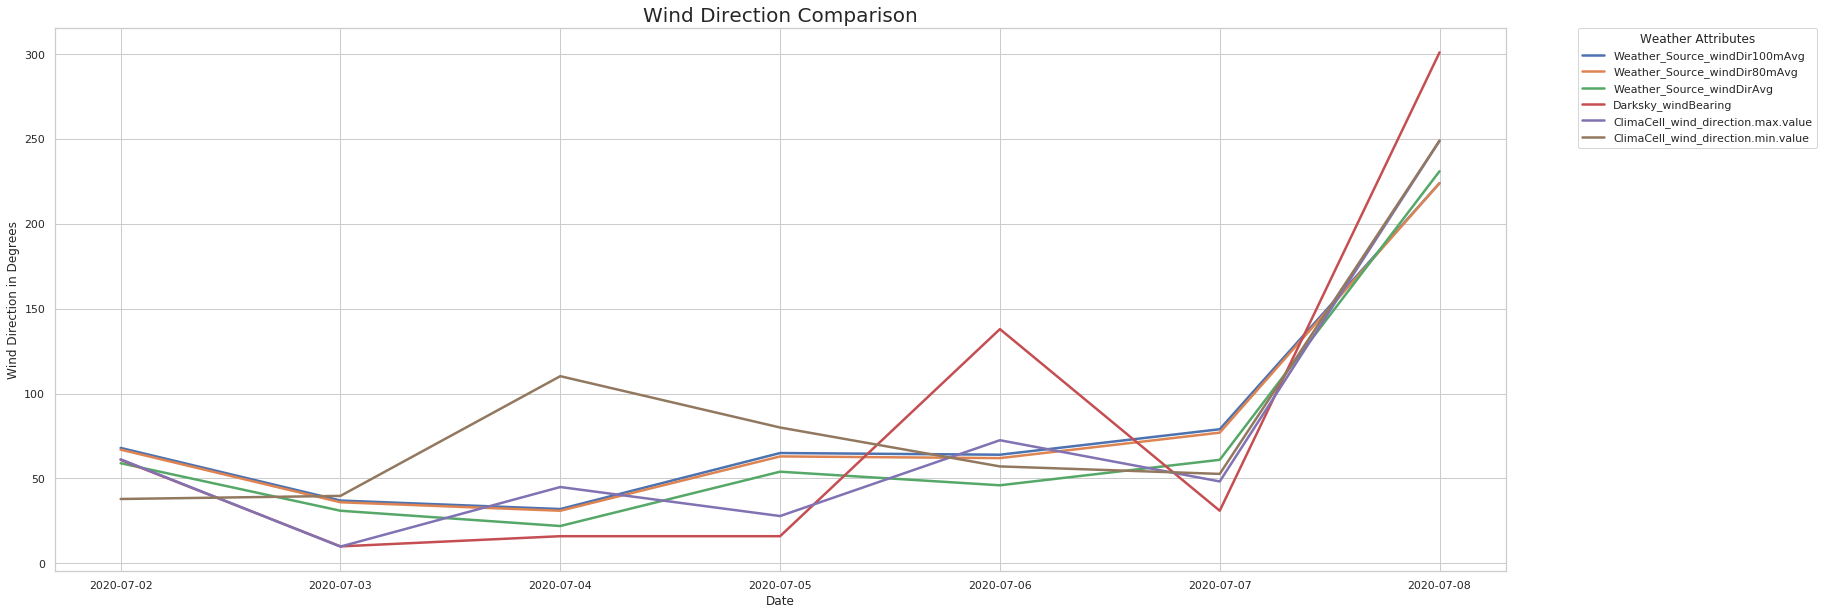

In [14]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','windDir100mAvg','windDir80mAvg','windDirAvg','windBearing', 'wind_direction.max.value', 'wind_direction.min.value']], ['Date']))
    new_labels = ['Weather_Source_windDir100mAvg', 'Weather_Source_windDir80mAvg', 'Weather_Source_windDirAvg', 'Darksky_windBearing', 'ClimaCell_wind_direction.max.value',
                  'ClimaCell_wind_direction.min.value']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Wind Direction in Degrees',title="Wind Direction Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Darksky has only one value for Wind Direction i.e. windBreaing but ClimaCell provides minimum and maximum values and Weather Source provide minimum, maximum and average values.**

## **Temperature Comparison**

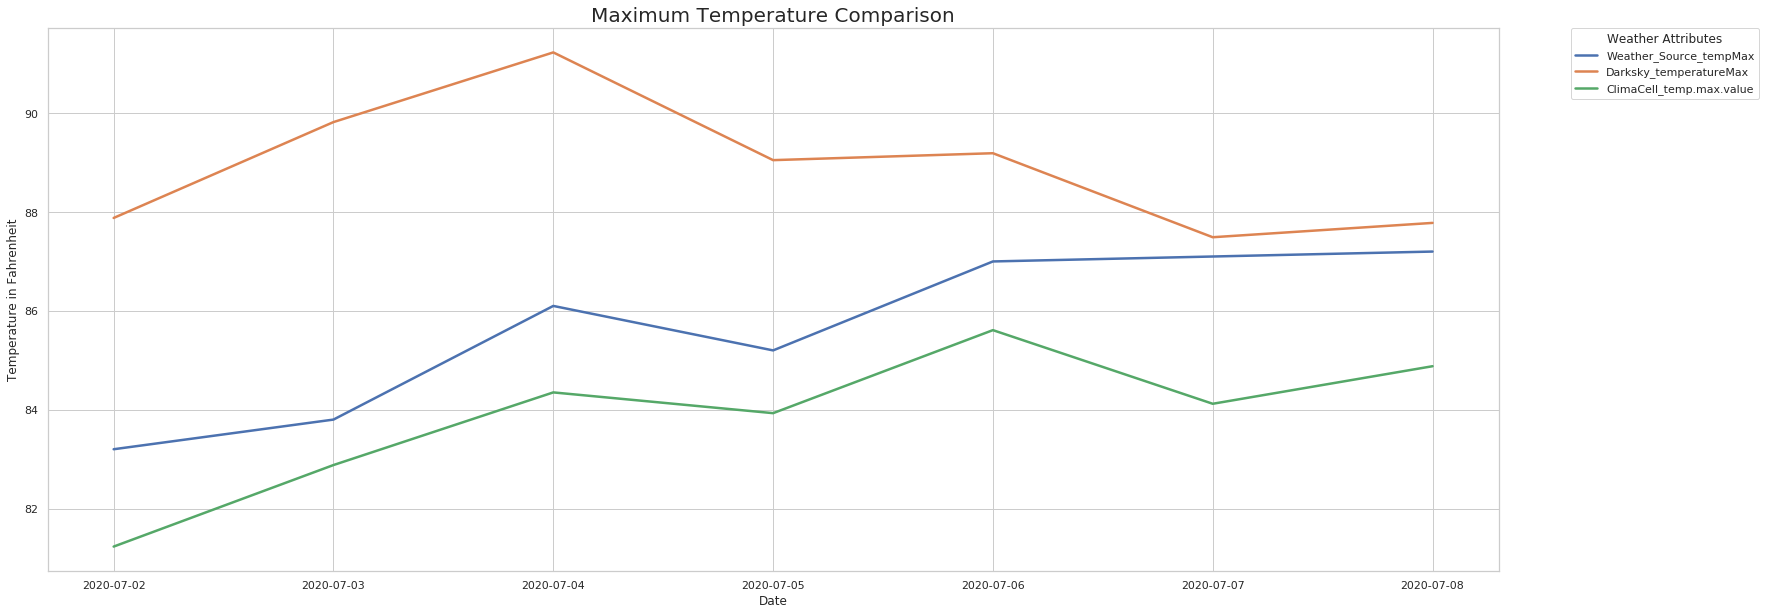

In [15]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMax', 'temperatureMax', 'temp.max.value']], ['Date']))
    new_labels = ['Weather_Source_tempMax','Darksky_temperatureMax', 'ClimaCell_temp.max.value']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Maximum Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Maximum temperature forecasted by darksky is higher than ClimaCell and Weather Source.**

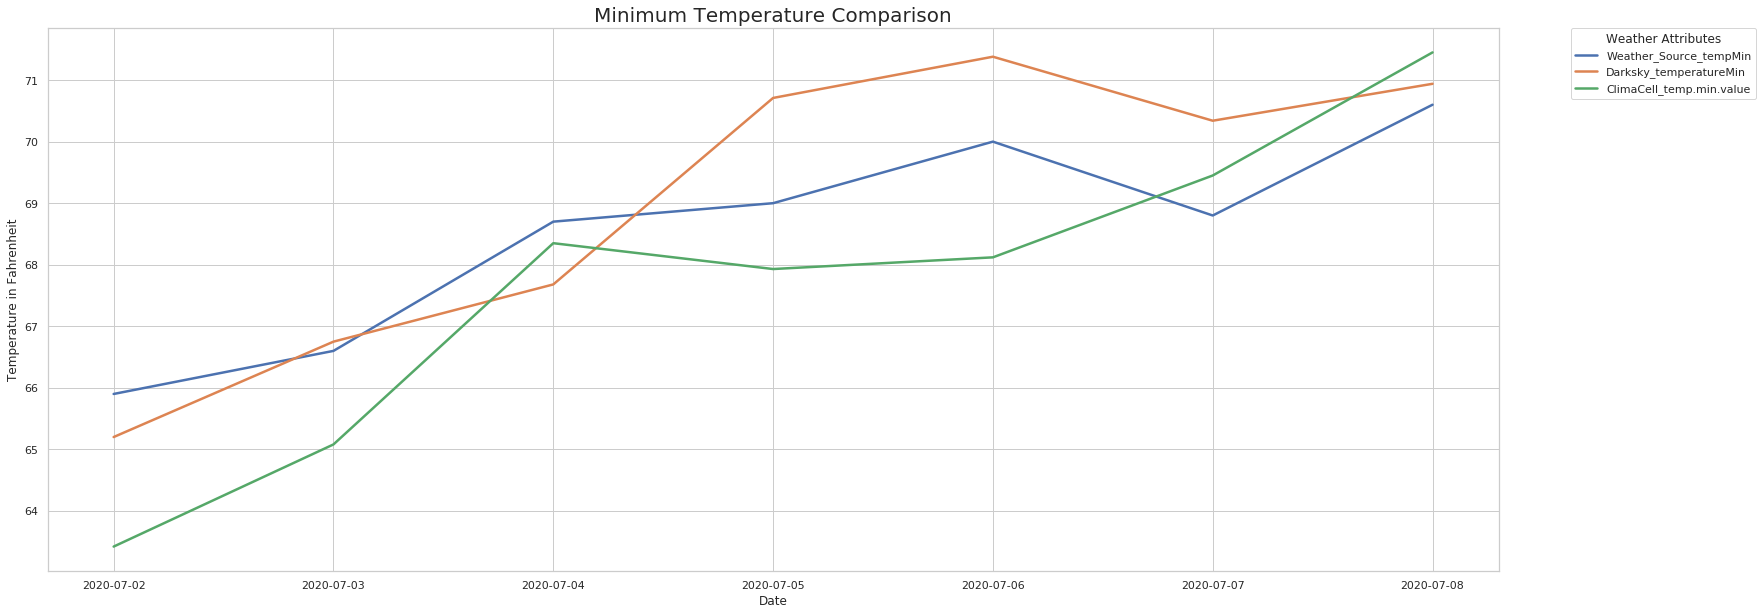

In [16]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','tempMin', 'temperatureMin', 'temp.min.value']], ['Date']))
    new_labels = ['Weather_Source_tempMin','Darksky_temperatureMin', 'ClimaCell_temp.min.value']
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Temperature in Fahrenheit',title="Minimum Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

## **CloudCover Comparison**

In [17]:
# bring cloud-cover to equal scale
merged_data['cloudCover'] = merged_data['cloudCover']*100

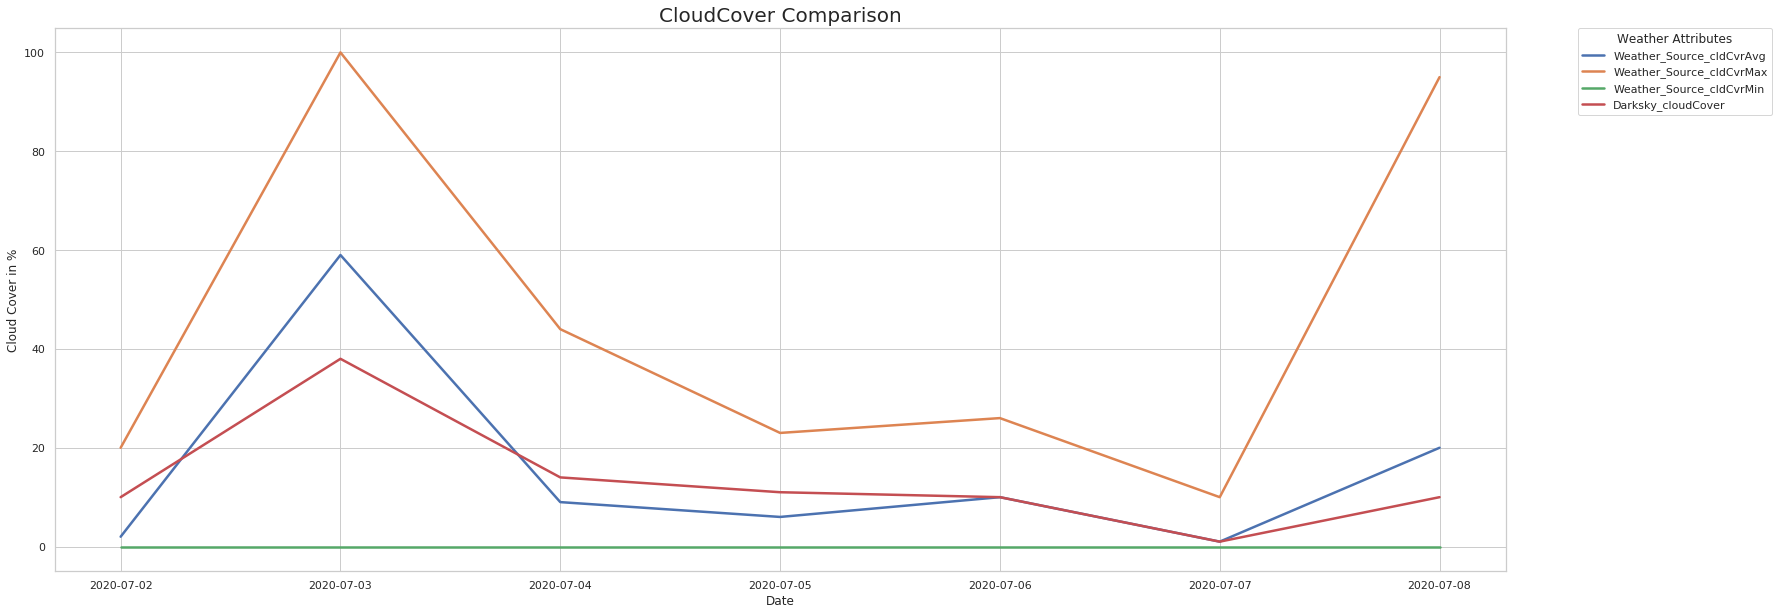

In [18]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                      data=pd.melt(merged_data[['Date','cldCvrAvg','cldCvrMax','cldCvrMin','cloudCover']], ['Date']))
    new_labels = ["Weather_Source_cldCvrAvg","Weather_Source_cldCvrMax","Weather_Source_cldCvrMin","Darksky_cloudCover"]
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Cloud Cover in %',title="CloudCover Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Weather Attributes',labels=new_labels)

**Darksky has only one value for CloudCover i.e cloudCover but Weather Source provides minimum, maximum and average values.** <br>
**Cloud Cover is not present in ClimaCell Daily Forecast Requests.**

## **Apparent Temperature Comparison**

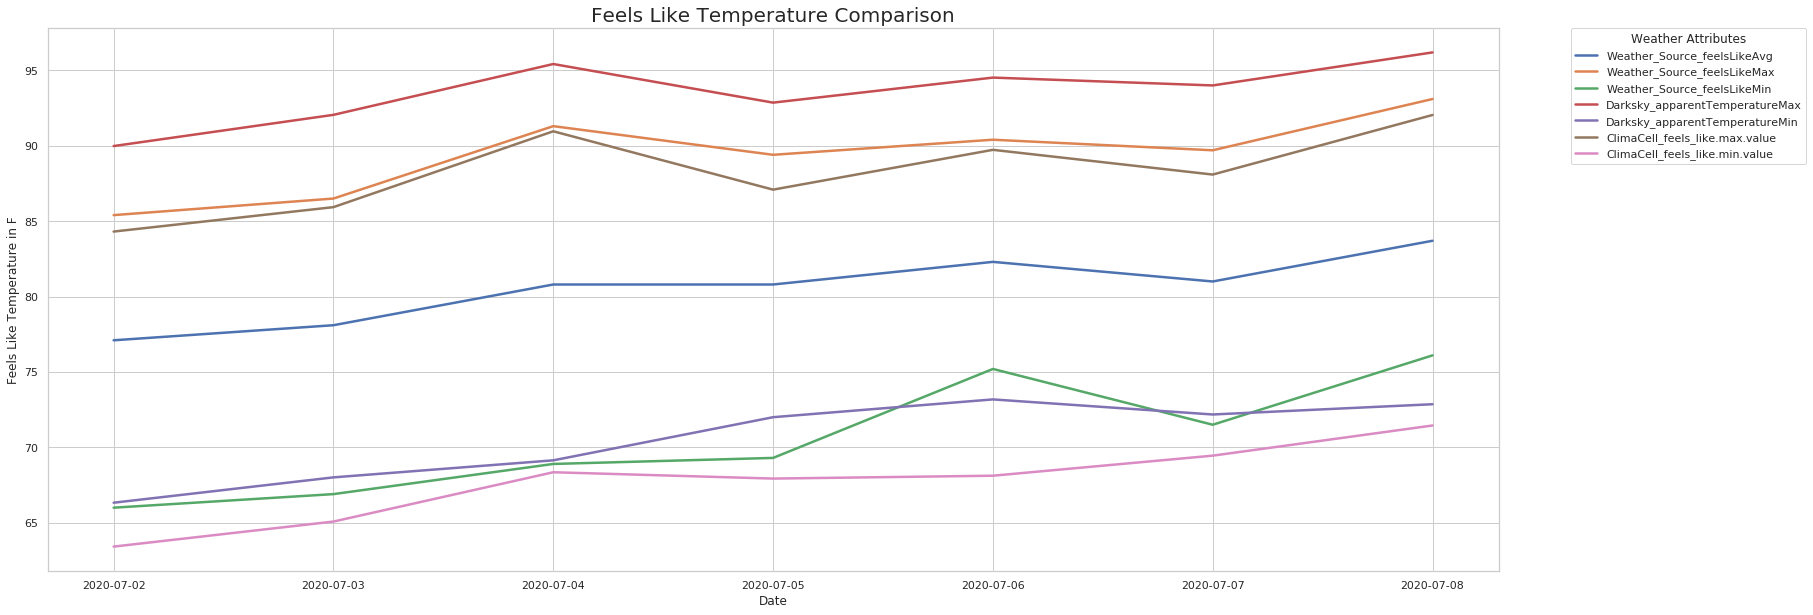

In [19]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','feelsLikeAvg','feelsLikeMax','feelsLikeMin', 'apparentTemperatureMax',
                                            'apparentTemperatureMin', 'feels_like.max.value', 'feels_like.min.value']], ['Date']))
    new_labels = ["Weather_Source_feelsLikeAvg","Weather_Source_feelsLikeMax","Weather_Source_feelsLikeMin",
                  "Darksky_apparentTemperatureMax", "Darksky_apparentTemperatureMin", 'ClimaCell_feels_like.max.value', 'ClimaCell_feels_like.min.value']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Feels Like Temperature in F',title="Feels Like Temperature Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Weather Source has maximum, minimum and average values for Apparent Temperature but Darksky and ClimaCell have maximum and minimum values.**

## **Dewpoint Comparison**

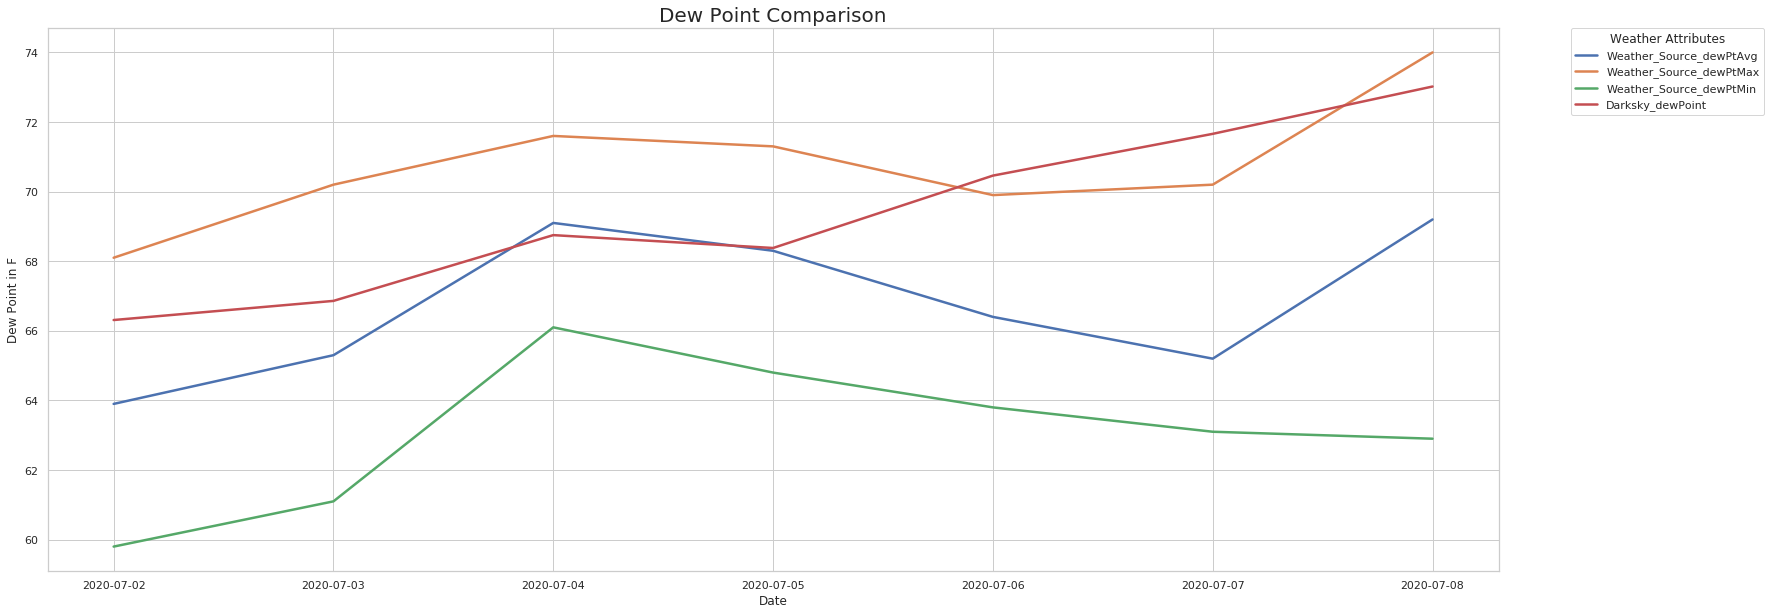

In [20]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','dewPtAvg', 'dewPtMax', 'dewPtMin', 'dewPoint']], ['Date']))
    new_labels = ["Weather_Source_dewPtAvg","Weather_Source_dewPtMax","Weather_Source_dewPtMin","Darksky_dewPoint"]
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Dew Point in F',title="Dew Point Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Darksky provides only one values for DewPoint but Weather Source provides minimum, maximum and average values.** <br>
**Dew Point is not present in ClimaCell Daily Forecast Requests.**

## **Pressure Comparison**

In [21]:
# convert baro pressure to milibars
merged_data['baro_pressure.max.value'] = merged_data['baro_pressure.max.value'] * 33.863886667
merged_data['baro_pressure.min.value'] = merged_data['baro_pressure.min.value'] * 33.863886667

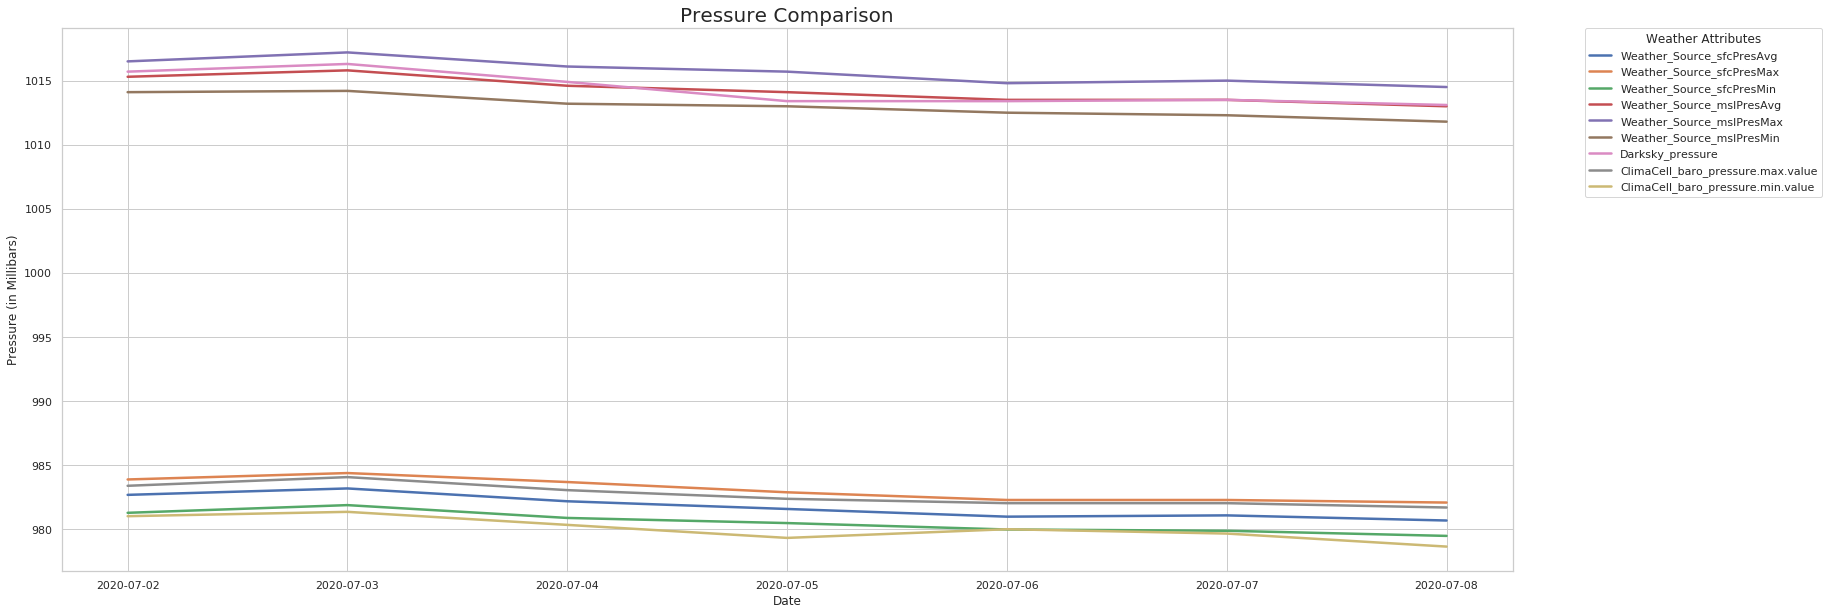

In [22]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','sfcPresAvg', 'sfcPresMax', 'sfcPresMin', 'mslPresAvg', 'mslPresMax', 'mslPresMin', 'pressure',
                                            'baro_pressure.max.value', 'baro_pressure.min.value']], ['Date']))
    new_labels = ["Weather_Source_sfcPresAvg","Weather_Source_sfcPresMax","Weather_Source_sfcPresMin",'Weather_Source_mslPresAvg',
                  'Weather_Source_mslPresMax', 'Weather_Source_mslPresMin', "Darksky_pressure", 'ClimaCell_baro_pressure.max.value', 'ClimaCell_baro_pressure.min.value']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Pressure (in Millibars)',title="Pressure Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Darksky has only one value for Pressure i.e. pressure but ClimaCell provides minimum and maximum values and Weather Source provide minimum, maximum and average values also has attributes like surface level pressure and mean sea level pressure.**

## **Humidity Comparison**

In [23]:
# bring humidity to equal scale
merged_data['humidity'] = merged_data['humidity']*100

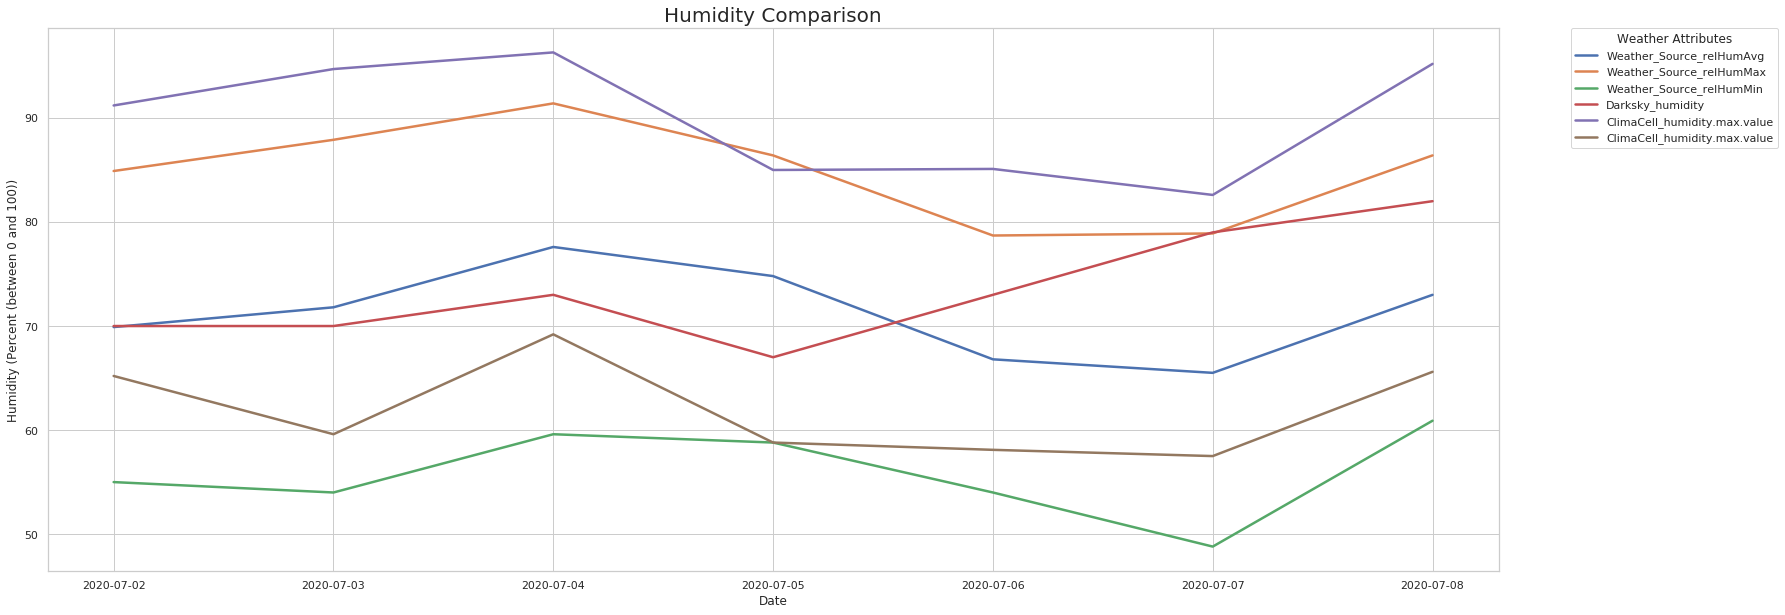

In [24]:
sns.set(rc={'figure.figsize':(26,10)})
sns.set_style("whitegrid")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Date', y='value', hue='variable', 
                  data=pd.melt(merged_data[['Date','relHumAvg', 'relHumMax', 'relHumMin', 'humidity', 'humidity.max.value', 'humidity.min.value']], ['Date']))
    new_labels = ["Weather_Source_relHumAvg","Weather_Source_relHumMax","Weather_Source_relHumMin","Darksky_humidity", 'ClimaCell_humidity.max.value', 'ClimaCell_humidity.max.value']
    
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Date', ylabel='Humidity (Percent (between 0 and 100))',title="Humidity Comparison")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=new_labels, title='Weather Attributes')

**Darksky has only one value for Humidity i.e. humidity but ClimaCell provides minimum and maximum values and Weather Source provide minimum, maximum and average values.**